<a href="https://colab.research.google.com/github/Alexa201228/ml_course_works/blob/main/Classification_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Домашнее задание по теме "Основы задач классификации"

Поработаем с [данными](https://github.com/obulygin/content/blob/main/possum_data/possum.csv) по физиологическим показателям опоссумов ^_^

Вам необходимо:  
1) Прочитать данные. Признак site нам не нужен - это номер ловушки, в которую был пойман опоссум.   
2) Проверить, есть ли в них проблемы, которые помешают дальнейшей работе (пропуски, аномалии, некорректные типы данных).  
3) Пострить модель, которая наиболее хорошо будет определять пол опоссума по выбранным параметрам. В качестве метрики качества используем F1-score, построить матрицу ошибок.  
4) Написать выводы о том, какие параметры наиболее значимы для определения пола опоссума.

Вы можете использовать любые инструменты подготовки данных, модели и способы их оптимизации, которые вам известны. Единственный критерий - максимизация метрики качества корректными способами.


*Сопровождайте все действия, которые могут предполагать альтернативные способы реализации, обоснованием*.

In [ ]:
!wget https://raw.githubusercontent.com/obulygin/content/main/possum_data/possum.csv

--2023-08-13 18:12:20--  https://raw.githubusercontent.com/obulygin/content/main/possum_data/possum.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5888 (5.8K) [text/plain]
Saving to: ‘possum.csv’

possum.csv          100%[===================>]   5.75K  --.-KB/s    in 0s      

2023-08-13 18:12:20 (68.4 MB/s) - ‘possum.csv’ saved [5888/5888]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Чтение и проверка данных

In [ ]:
# Этот код позволяет выводить результаты выполнения всех строк в ячейке
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity == "all"

False

In [ ]:
possum_df = pd.read_csv('./possum.csv', index_col=0)
possum_df.drop(labels=['site'], axis=1, inplace=True)
possum_df.info()
possum_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       104 non-null    object 
 1   age       102 non-null    float64
 2   hdlngth   104 non-null    float64
 3   skullw    104 non-null    float64
 4   totlngth  104 non-null    float64
 5   taill     104 non-null    float64
 6   footlgth  103 non-null    float64
 7   earconch  104 non-null    float64
 8   eye       104 non-null    float64
 9   chest     104 non-null    float64
 10  belly     104 non-null    float64
dtypes: float64(10), object(1)
memory usage: 9.8+ KB


,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
possum_df.isna().sum()

sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [ ]:
possum_df['age'].fillna(possum_df['age'].mean(), inplace=True)
possum_df['footlgth'].fillna(possum_df['footlgth'].mean(), inplace=True)

In [ ]:
# Датасет содержит категориальный признак sex (который также является целевой переменной).
# Он не позволяет построить корреляционную матрицу.
# Применим энкодер для данного признака (так можно делать при небольшом количестве категорий)
# чтобы заменить категориальное представление признака на численное и построить корреляционную матрицу

from sklearn.preprocessing import LabelEncoder

lb_encoder = LabelEncoder()
possum_df['sex'] = lb_encoder.fit_transform(possum_df['sex'])

<Axes: >

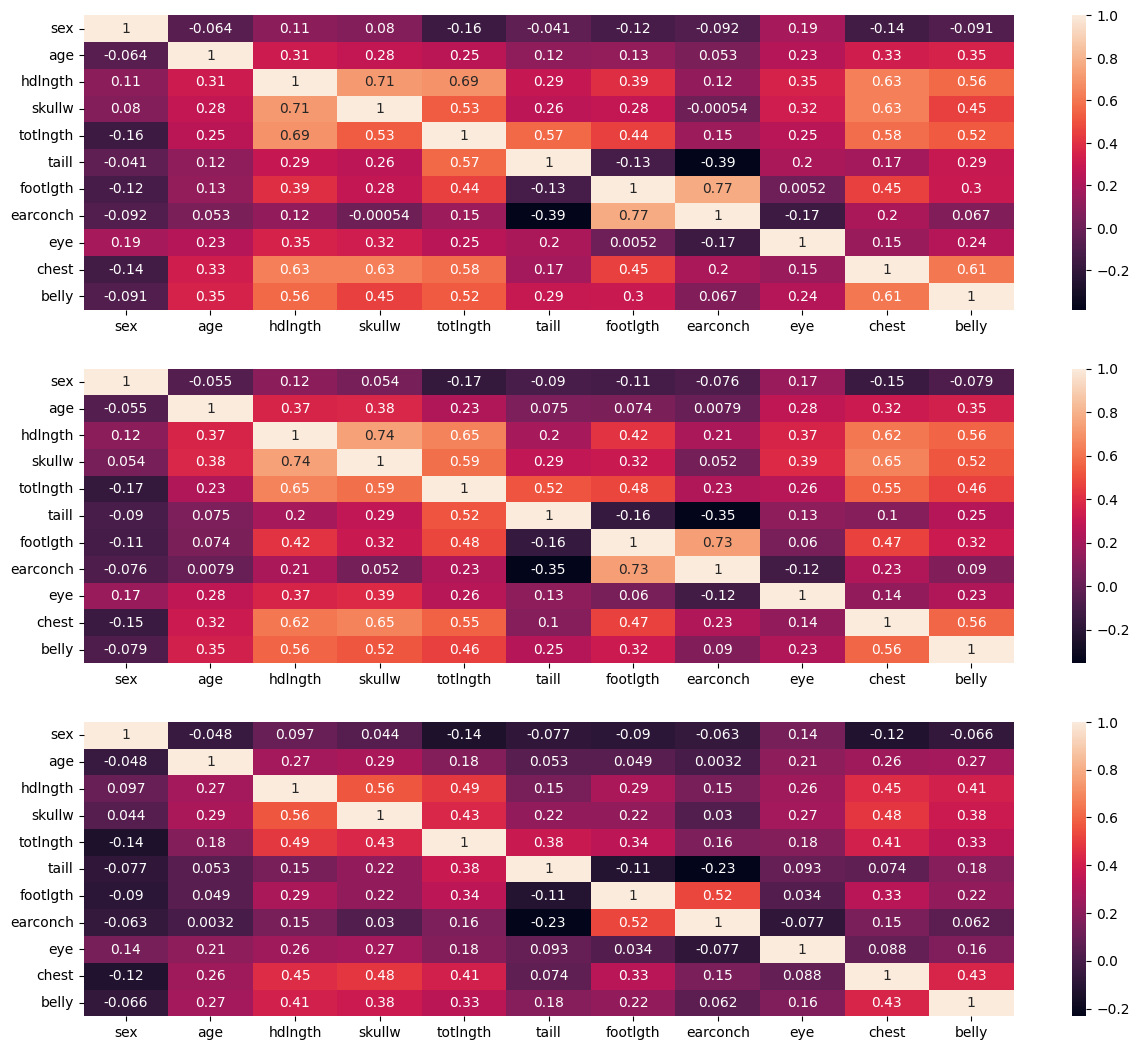

In [ ]:

fig, ax = plt.subplots(3, 1, figsize=(15, 13))
sns.heatmap(possum_df.corr('pearson'), ax=ax[0], annot=True)
sns.heatmap(possum_df.corr('spearman'), ax=ax[1], annot=True)
sns.heatmap(possum_df.corr('kendall'), ax=ax[2], annot=True)

Корреляционные матрицы не показали значительного влияния какого-либо определенного признака на пол

In [ ]:
# Используем все признаки для определения пола

X = possum_df.drop("sex", axis=1)
y = possum_df["sex"]

In [ ]:
# Разделим выборку на обучающую и тестовую

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Используем нормализацию для уменьшения влияния размерности данных на их важность в итоговой модели
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Модель логистической регрессии

In [ ]:
# Обучим модель логистической регрессии

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(X_train_scaled, y_train)


LogisticRegression()

Text(120.72222222222221, 0.5, 'y true')

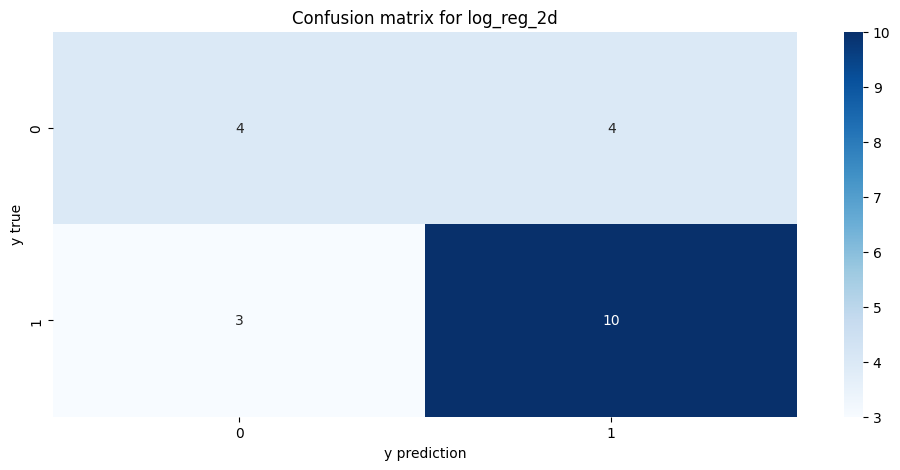

In [ ]:
# Построение матрицы ошибок

from sklearn import metrics

log_reg_pred = log_model.predict(X_test_scaled)

confusion_matrix = metrics.confusion_matrix(y_test, log_reg_pred)

fig, axes = plt.subplots(figsize=(12, 5))
# Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix, annot=True, fmt='', cmap='Blues')
# Добавляем название графику и подписи осей абсцисс и ординат
axes.set_title('Confusion matrix for log_reg_2d')
axes.set_xlabel('y prediction')
axes.set_ylabel('y true')

In [ ]:
# Проверка качества модели с помощью метрик precision, recall и f1-score

print(f"Precision: {metrics.precision_score(y_test, log_reg_pred)}")
print(f"Recall: {metrics.recall_score(y_test, log_reg_pred)}")
print(f"F1-score: {metrics.f1_score(y_test, log_reg_pred)}")
print(metrics.classification_report(y_test, log_reg_pred))

Precision: 0.7142857142857143
Recall: 0.7692307692307693
F1-score: 0.7407407407407408
              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.71      0.77      0.74        13

    accuracy                           0.67        21
   macro avg       0.64      0.63      0.64        21
weighted avg       0.66      0.67      0.66        21



<Axes: ylabel='Feature'>

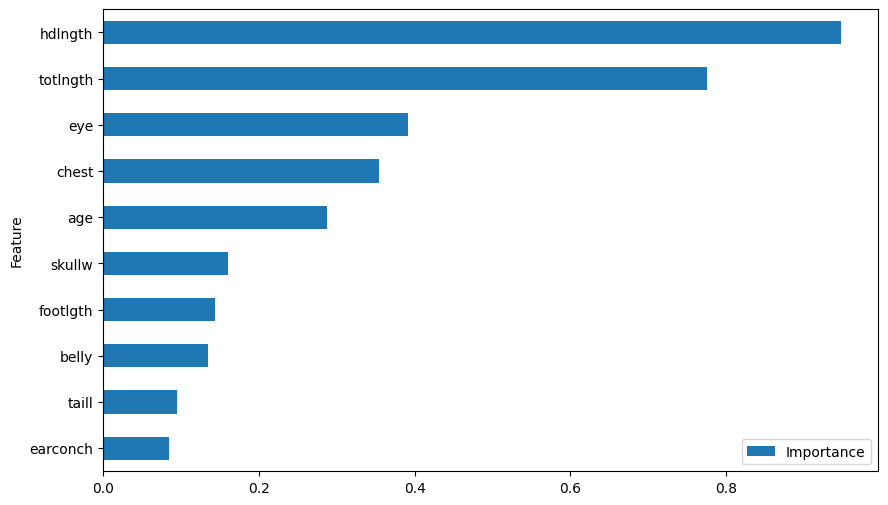

In [ ]:
# Важность признаков при определении пола

coefficients = log_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Используем смещение порога для улучшения качества модели

In [ ]:
# Смещение порога

y_proba_pred1 = log_model.predict_proba(X_test_scaled)[:, 1]

# Для удобства завернём numpy-массив в Pandas Series

y_proba_pred1 = pd.Series(y_proba_pred1)
# Создадим списки, в которых будем хранить значения метрик
recall_scores1 = []
precision_scores1 = []
f1_scores1 = []

# Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds1 = np.arange(0.1, 1, 0.05)

# В цикле будем перебирать сгенерированные пороги
for threshold in thresholds1:
    #Пациентов, для которых вероятность наличия диабета > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred1.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores1.append(metrics.recall_score(y_test, y_pred))
    precision_scores1.append(metrics.precision_score(y_test, y_pred))
    f1_scores1.append(metrics.f1_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


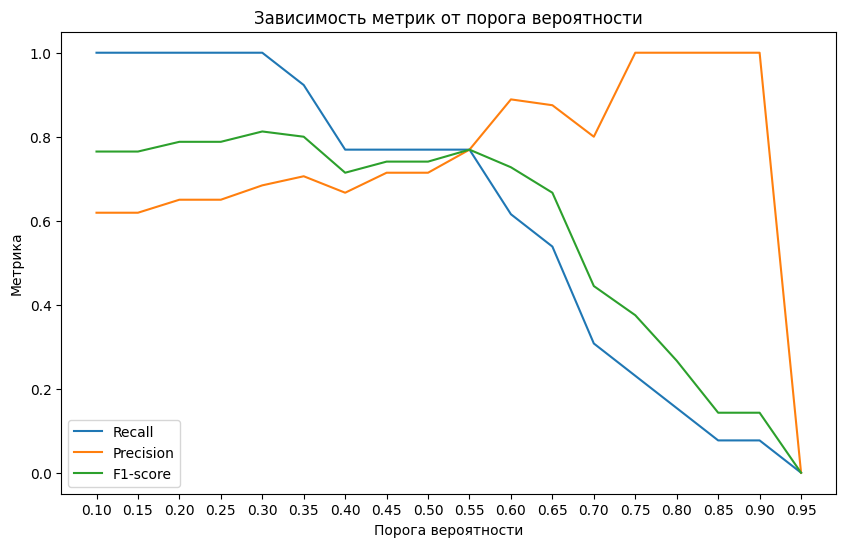

In [ ]:
# Строим линейный график зависимости recall от threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds1, recall_scores1, label='Recall')
# Строим линейный график зависимости precision от threshold
plt.plot(thresholds1, precision_scores1, label='Precision')
# Строим линейный график зависимости F1 от threshold
plt.plot(thresholds1, f1_scores1, label='F1-score')

plt.title('Зависимость метрик от порога вероятности')
plt.xlabel('Порога вероятности')
plt.ylabel('Метрика')
plt.xticks(thresholds1)
plt.legend()

In [ ]:
# Используем оптимальный порог вероятностей

threshold_opt1 = 0.55

y_pred_opt1 = y_proba_pred1.apply(lambda x: 1 if x > threshold_opt1 else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_pred_opt1))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.77      0.77      0.77        13

    accuracy                           0.71        21
   macro avg       0.70      0.70      0.70        21
weighted avg       0.71      0.71      0.71        21



Модель логистической регрессии показала достаточно невысокую точность определения целевого признака по всем признакам

In [ ]:
# (Эксперимент) Используем полиномиальные фичи

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

poly_features.fit(X_train_scaled)

X_train_scaled_poly = poly_features.transform(X_train_scaled)
X_test_scaled_poly = poly_features.transform(X_test_scaled)

log_model2 = LogisticRegression()


log_model2.fit(X_train_scaled_poly, y_train)

poly_preds = log_model2.predict(X_test_scaled_poly)

# Проверка качества модели
print(f"Precision: {metrics.precision_score(y_test, poly_preds)}")
print(f"Recall: {metrics.recall_score(y_test, poly_preds)}")
print(f"F1-score: {metrics.f1_score(y_test, poly_preds)}")
print(metrics.classification_report(y_test, poly_preds))

Precision: 0.8333333333333334
Recall: 0.7692307692307693
F1-score: 0.8
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.83      0.77      0.80        13

    accuracy                           0.76        21
   macro avg       0.75      0.76      0.75        21
weighted avg       0.77      0.76      0.76        21



Используем смещение порога вероятности

In [ ]:
# Смещение порога

y_proba_pred2 = log_model2.predict_proba(X_test_scaled_poly)[:, 1]

# Для удобства завернём numpy-массив в Pandas Series

y_proba_pred2 = pd.Series(y_proba_pred2)
# Создадим списки, в которых будем хранить значения метрик
recall_scores2 = []
precision_scores2 = []
f1_scores2 = []

# Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds2 = np.arange(0.1, 1, 0.05)

# В цикле будем перебирать сгенерированные пороги
for threshold in thresholds2:
    #Пациентов, для которых вероятность наличия диабета > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred2.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores2.append(metrics.recall_score(y_test, y_pred))
    precision_scores2.append(metrics.precision_score(y_test, y_pred))
    f1_scores2.append(metrics.f1_score(y_test, y_pred))

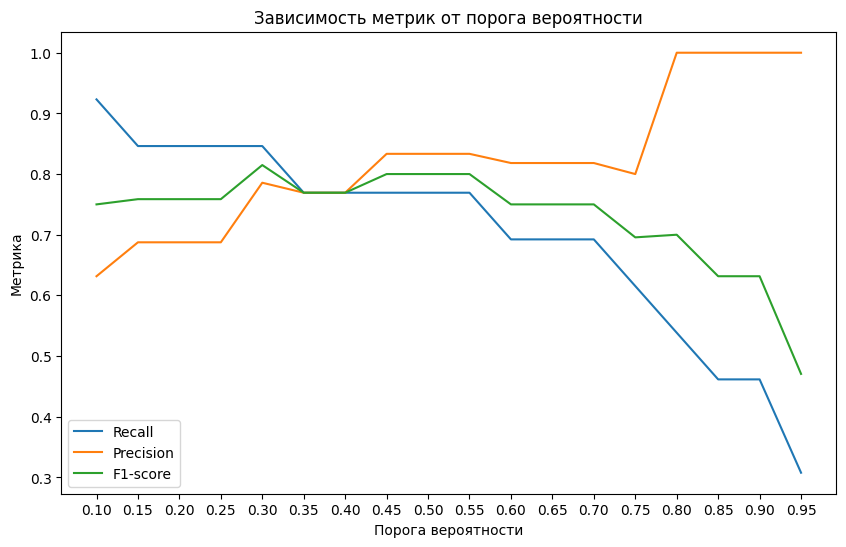

In [ ]:
# Строим линейный график зависимости recall от threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds2, recall_scores2, label='Recall')
# Строим линейный график зависимости precision от threshold
plt.plot(thresholds2, precision_scores2, label='Precision')
# Строим линейный график зависимости F1 от threshold
plt.plot(thresholds2, f1_scores2, label='F1-score')

plt.title('Зависимость метрик от порога вероятности')
plt.xlabel('Порога вероятности')
plt.ylabel('Метрика')
plt.xticks(thresholds2)
plt.legend()

In [ ]:
# Используем оптимальный порог вероятностей

threshold_opt2 = 0.35

y_pred_opt2 = y_proba_pred2.apply(lambda x: 1 if x > threshold_opt2 else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_pred_opt2))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.77      0.77      0.77        13

    accuracy                           0.71        21
   macro avg       0.70      0.70      0.70        21
weighted avg       0.71      0.71      0.71        21



С помощью полиномиальных фич удалось повысить качество модели для определения обоих классов по метрикам precision и f1-score, однако при смещении порога качество модели ухудшилось

### Деревья решений и случайный лес

In [ ]:
# Построим модель с использованием деревьев решений

from sklearn import tree


dec_tree = tree.DecisionTreeClassifier(
    criterion="entropy",
    max_depth=6,
    random_state=42,
)


In [ ]:
# Модель без полиноминальных признаков
dec_tree.fit(X_train, y_train)

pred_simple = dec_tree.predict(X_test)

# Проверка качества модели
print(f"Precision: {metrics.precision_score(y_test, pred_simple)}")
print(f"Recall: {metrics.recall_score(y_test, pred_simple)}")
print(f"F1-score: {metrics.f1_score(y_test, pred_simple)}")
print(metrics.classification_report(y_test, pred_simple))

Precision: 0.6923076923076923
Recall: 0.6923076923076923
F1-score: 0.6923076923076923
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.69      0.69      0.69        13

    accuracy                           0.62        21
   macro avg       0.60      0.60      0.60        21
weighted avg       0.62      0.62      0.62        21



In [ ]:
# Модель с полиноминальными признаками

dec_tree2 = tree.DecisionTreeClassifier(
    criterion="entropy",
    max_depth=6,
    random_state=42,
)

dec_tree2.fit(X_train_scaled_poly, y_train)

pred_poly = dec_tree2.predict(X_test_scaled_poly)

# Проверка качества модели
print(f"Precision: {metrics.precision_score(y_test, pred_poly)}")
print(f"Recall: {metrics.recall_score(y_test, pred_poly)}")
print(f"F1-score: {metrics.f1_score(y_test, pred_poly)}")
print(metrics.classification_report(y_test, pred_poly))

Precision: 0.625
Recall: 0.38461538461538464
F1-score: 0.4761904761904762
              precision    recall  f1-score   support

           0       0.38      0.62      0.48         8
           1       0.62      0.38      0.48        13

    accuracy                           0.48        21
   macro avg       0.50      0.50      0.48        21
weighted avg       0.53      0.48      0.48        21



In [ ]:
dec_tree.feature_importances_

array([0.        , 0.21005513, 0.        , 0.16231374, 0.06955105,
       0.3996573 , 0.069319  , 0.08910378, 0.        , 0.        ])

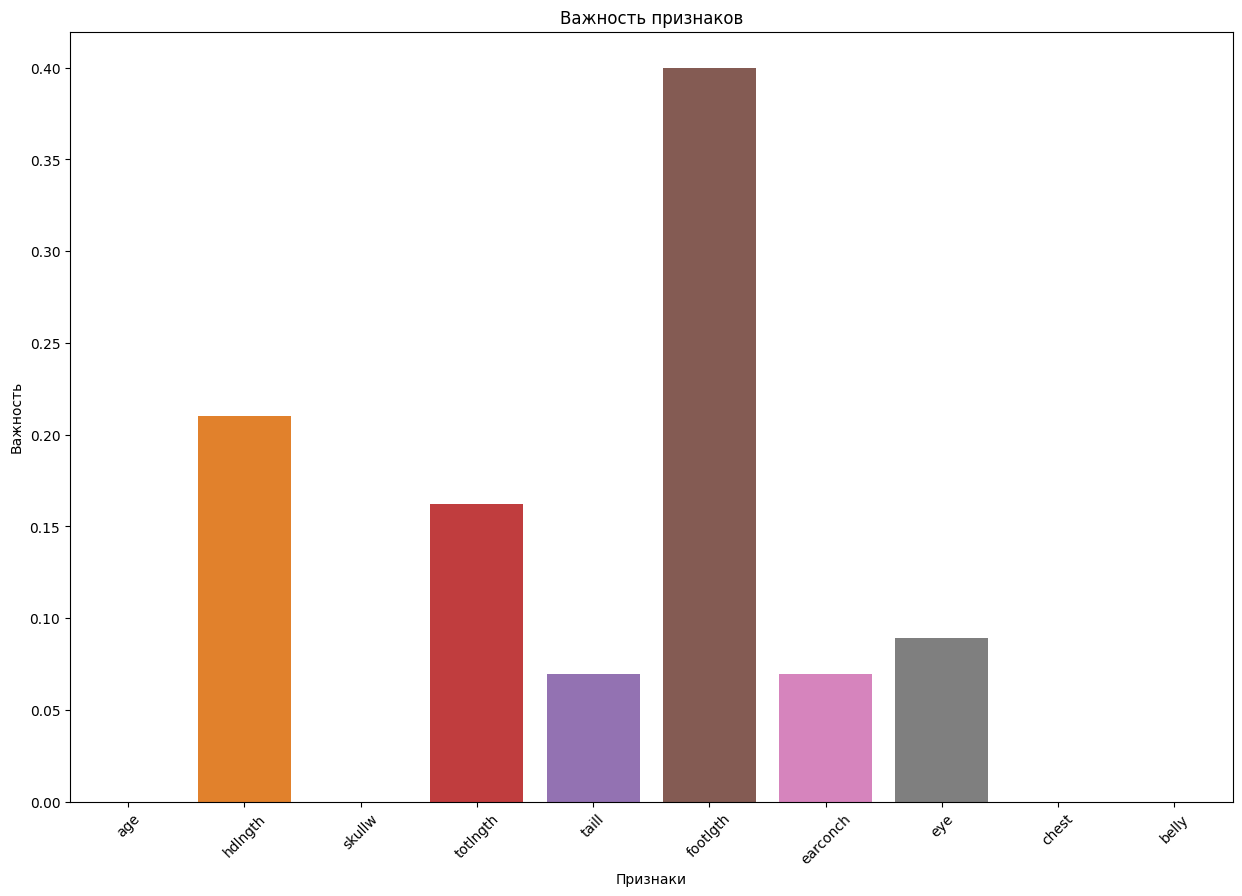

In [ ]:
feature = X_train.columns #признаки
feature_importances = dec_tree.feature_importances_ #важность признаков
plt.figure(figsize=(15, 10))

# Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances)

# Добавляем подпись графику, осям абсцисс и ординат
plt.title('Важность признаков')
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.xticks(rotation=45)
plt.show()

Дерево решений показало себя намного хуже при определении пола опоссумов

In [ ]:
# Случайный лес

from sklearn import ensemble

rf_classifier = ensemble.RandomForestClassifier(
    n_estimators=500,
    criterion="entropy",
    max_depth=6,
    max_features="sqrt",
    random_state=42,
)

rf_classifier.fit(X_train_scaled, y_train)

rf_pred = rf_classifier.predict(X_test_scaled)

print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.75      0.92      0.83        13

    accuracy                           0.76        21
   macro avg       0.78      0.71      0.72        21
weighted avg       0.77      0.76      0.75        21



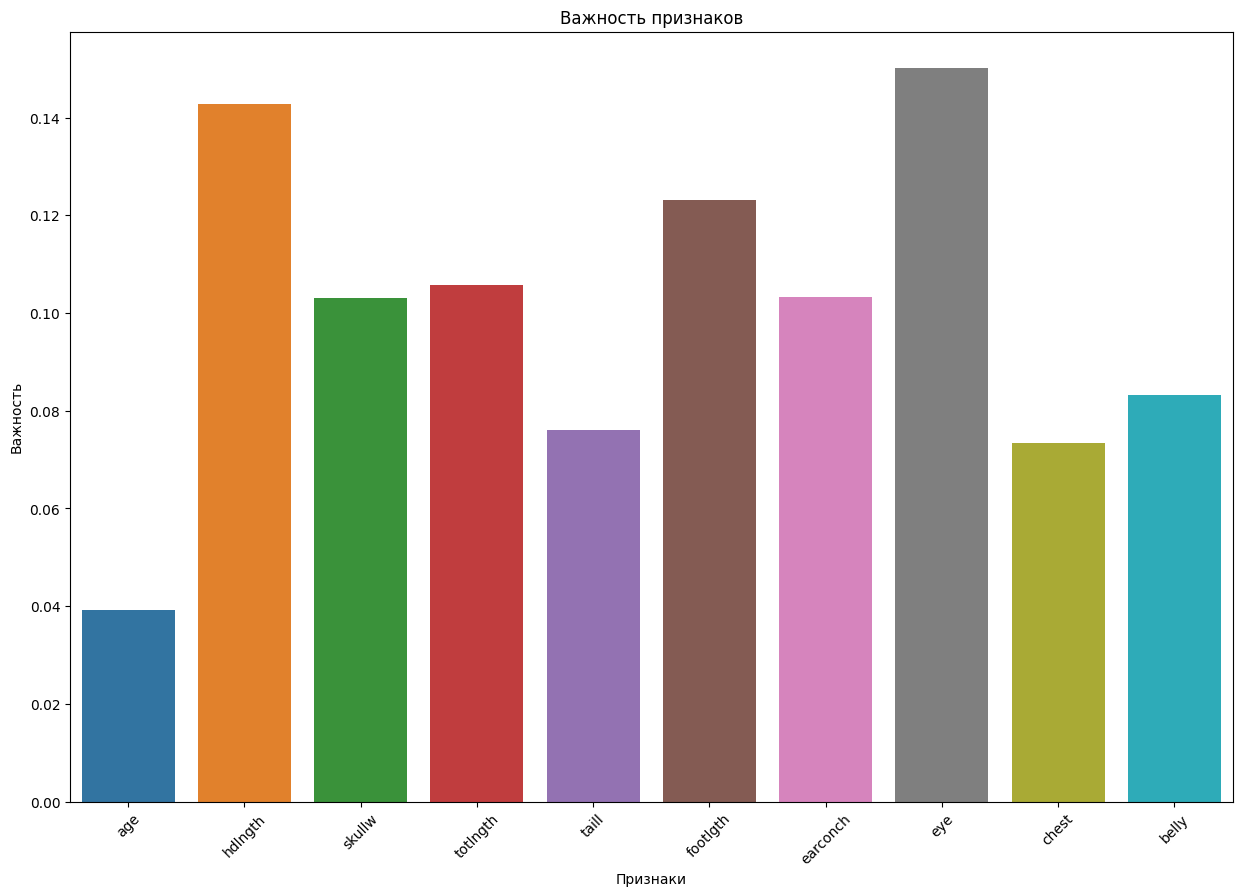

In [ ]:
feature = X_train.columns #признаки
feature_importances = rf_classifier.feature_importances_ #важность признаков
plt.figure(figsize=(15, 10))

# Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances)

# Добавляем подпись графику, осям абсцисс и ординат
plt.title('Важность признаков')
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.xticks(rotation=45)
plt.show()

### Вывод

При построении моделей с помощью деревьев большую роль при определении пола сыграли следующие признаки:

Для логистической регрессии:
1. Длина головы
2. Общая длина
3. Диаметр глаз

Для дерева решений:
1. Длина стопы
2. Длина головы
3. Общая длина

Для случайного леса:
1. Диаметр глаз
2. Длина головы
3. Длина стопы


### Наблюдение

Модель логистической регрессии с полиномиальными признаками без смещения порога показала достаточно высокое качество по метрикам и может быть хорошей заменой модели случайного леса в случае необходимости ускорения вычислений